In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
df = pd.read_csv('Survey_data.csv', encoding='latin1')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 15 columns):
 #   Column                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                    --------------  ----- 
 0   No                                                                                                        36 non-null     int64 
 1   Email Address                                                                                             36 non-null     object
 2   Age                                                                                                       36 non-null     int64 
 3   Gender                                                                                                    36 non-null     object
 4   Year                                                                                    

In [26]:
df.describe()

,No,Age,Year,"3. On a scale from 1 to 5, how satisfied are you with your current course?"
count,36.000000,36.000000,36.000000,36.000000
mean,18.500000,20.888889,3.027778,3.694444
std,10.535654,1.545090,0.844685,1.064208
min,1.000000,18.000000,1.000000,1.000000
25%,9.750000,20.000000,3.000000,3.000000
50%,18.500000,21.000000,3.000000,4.000000
75%,27.250000,21.250000,4.000000,4.250000
max,36.000000,26.000000,4.000000,5.000000


In [27]:
print(df.head())

   No               Email Address  Age  Gender  Year  \
0   1       kikingwidi1@gmail.com   19    Male     2   
1   2  ronnikkoperigo12@gmail.com   20    Male     3   
2   3  mackenzievilleza@gmail.com   22    Male     4   
3   4    leahgenille122@gmail.com   21  Female     2   
4   5    phaemalisangco@gmail.com   19  Female     2   

  1.  What course are you currently enrolled in?   \
0                                            BSIT   
1                                            BSIT   
2                                            BSIT   
3                                            BSIT   
4                                            BSIT   

  2.  Did you choose to study IT on your own, or were you influenced by someone else?   \
0                                    Chose on my own                                     
1                                    Chose on my own                                     
2                                    Chose on my own                      

In [28]:
print(df.columns)

Index(['No', 'Email Address', 'Age', 'Gender', 'Year',
       '1.  What course are you currently enrolled in? ',
       '2.  Did you choose to study IT on your own, or were you influenced by someone else? ',
       '3.  On a scale from 1 to 5, how satisfied are you with your current course? ',
       '4.  What factors influenced your decision to pursue your current course? ',
       ' 5. If you were given a chance, would you switch to a different course?  ',
       '6.  How involved were your parents in your decision to choose your course?  ',
       ' 7. Did your parents encourage you to pursue a specific career or course?  ',
       '8.  What is your parents approximate monthly income? ',
       '9. If you were pressured to take up IT, how did it affect your performance and interest in the course?  ',
       '10. What would be your preferred course if you were not influenced by others? '],
      dtype='object')


In [29]:
#Data Wrangling

df.dropna(subset=['2.  Did you choose to study IT on your own, or were you influenced by someone else? ',
                  '3.  On a scale from 1 to 5, how satisfied are you with your current course? ',
                  '8.  What is your parents approximate monthly income? '], inplace=True)

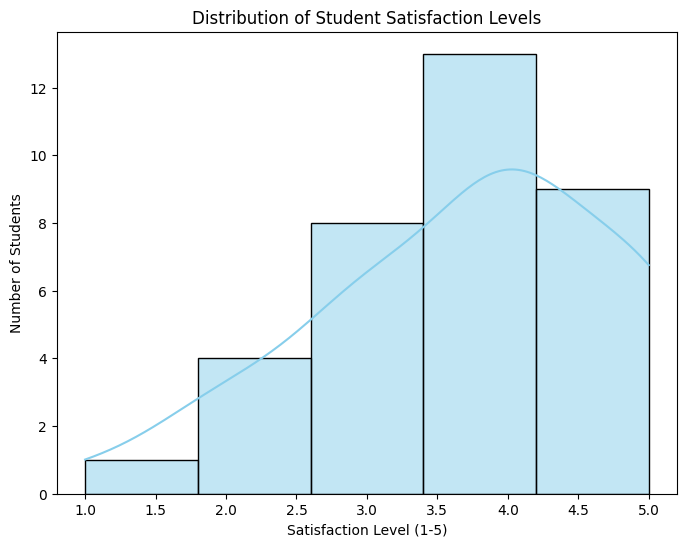

In [30]:
#Univariate Histogram Plot
plt.figure(figsize=(8, 6))
sns.histplot(df['3.  On a scale from 1 to 5, how satisfied are you with your current course? '], bins=5, kde=True, color='skyblue')
plt.title('Distribution of Student Satisfaction Levels')
plt.xlabel('Satisfaction Level (1-5)')
plt.ylabel('Number of Students')
plt.show()

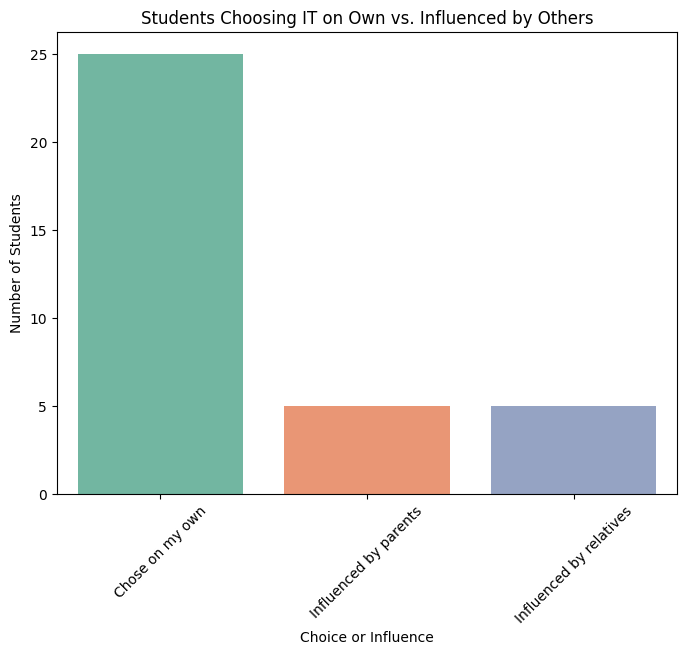

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(
    x='2.  Did you choose to study IT on your own, or were you influenced by someone else? ',
    hue='2.  Did you choose to study IT on your own, or were you influenced by someone else? ',
    data=df,
    palette='Set2',
    dodge=False
)
plt.title('Students Choosing IT on Own vs. Influenced by Others')
plt.xlabel('Choice or Influence')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)
plt.show()

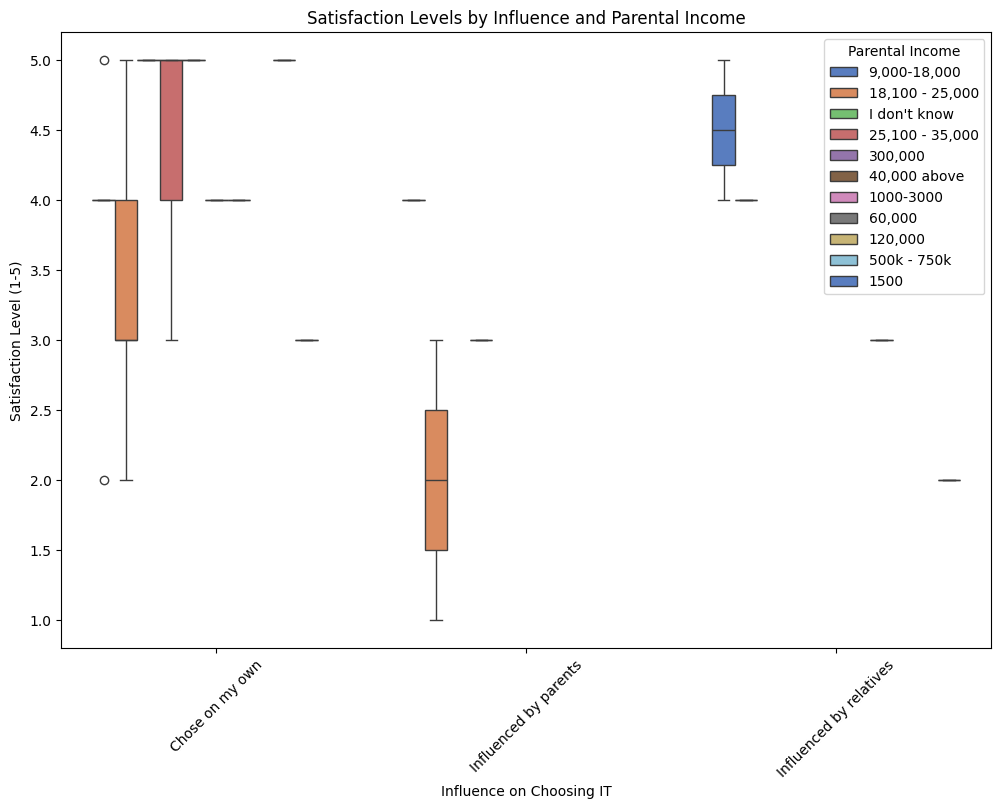

In [32]:
#Multivariate Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='2.  Did you choose to study IT on your own, or were you influenced by someone else? ',
            y='3.  On a scale from 1 to 5, how satisfied are you with your current course? ',
            hue='8.  What is your parents approximate monthly income? ',
            data=df, palette='muted')
plt.title('Satisfaction Levels by Influence and Parental Income')
plt.xlabel('Influence on Choosing IT')
plt.ylabel('Satisfaction Level (1-5)')
plt.xticks(rotation=45)
plt.legend(title='Parental Income')
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [36]:
#Data Preparation for Clustering
#Convert categorical variables to numerical values using Label Encoding
le_influence = LabelEncoder()
le_income = LabelEncoder()

df['Influence'] = le_influence.fit_transform(df['2.  Did you choose to study IT on your own, or were you influenced by someone else? '])
df['Income'] = le_income.fit_transform(df['8.  What is your parents approximate monthly income? '])

#Select features for clustering
X = df[['3.  On a scale from 1 to 5, how satisfied are you with your current course? ', 'Influence', 'Income']]

In [37]:
#Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Number of clusters can be adjusted
df['Cluster'] = kmeans.fit_predict(X)

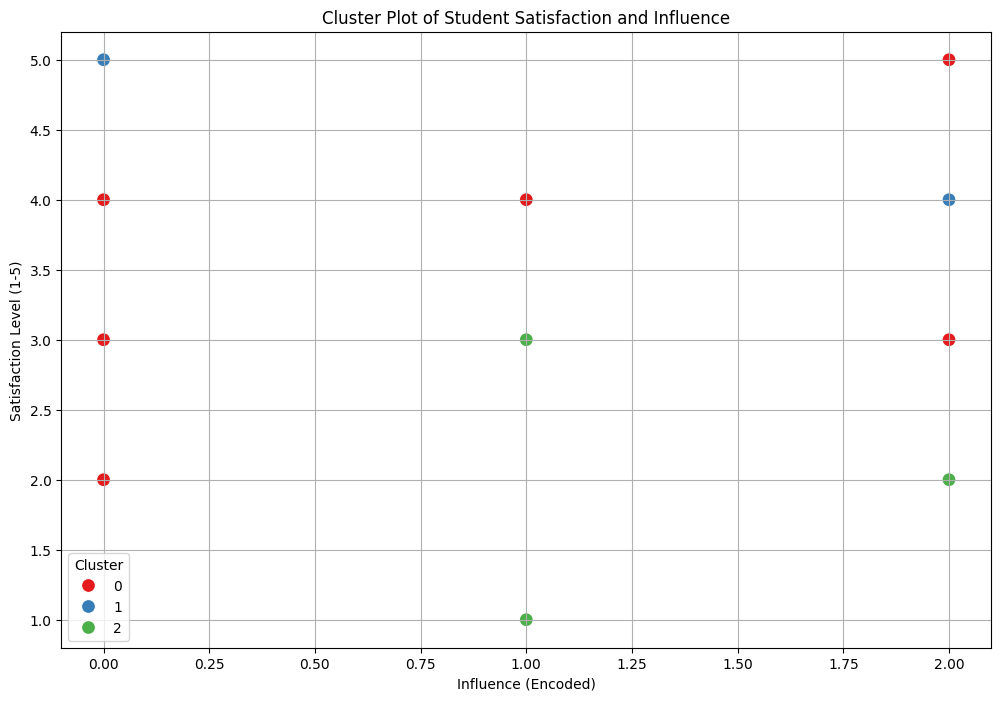

In [41]:
#Cluster Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Influence', y='3.  On a scale from 1 to 5, how satisfied are you with your current course? ',
                hue='Cluster', data=df, palette='Set1', s=100)
plt.title('Cluster Plot of Student Satisfaction and Influence')
plt.xlabel('Influence (Encoded)')
plt.ylabel('Satisfaction Level (1-5)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

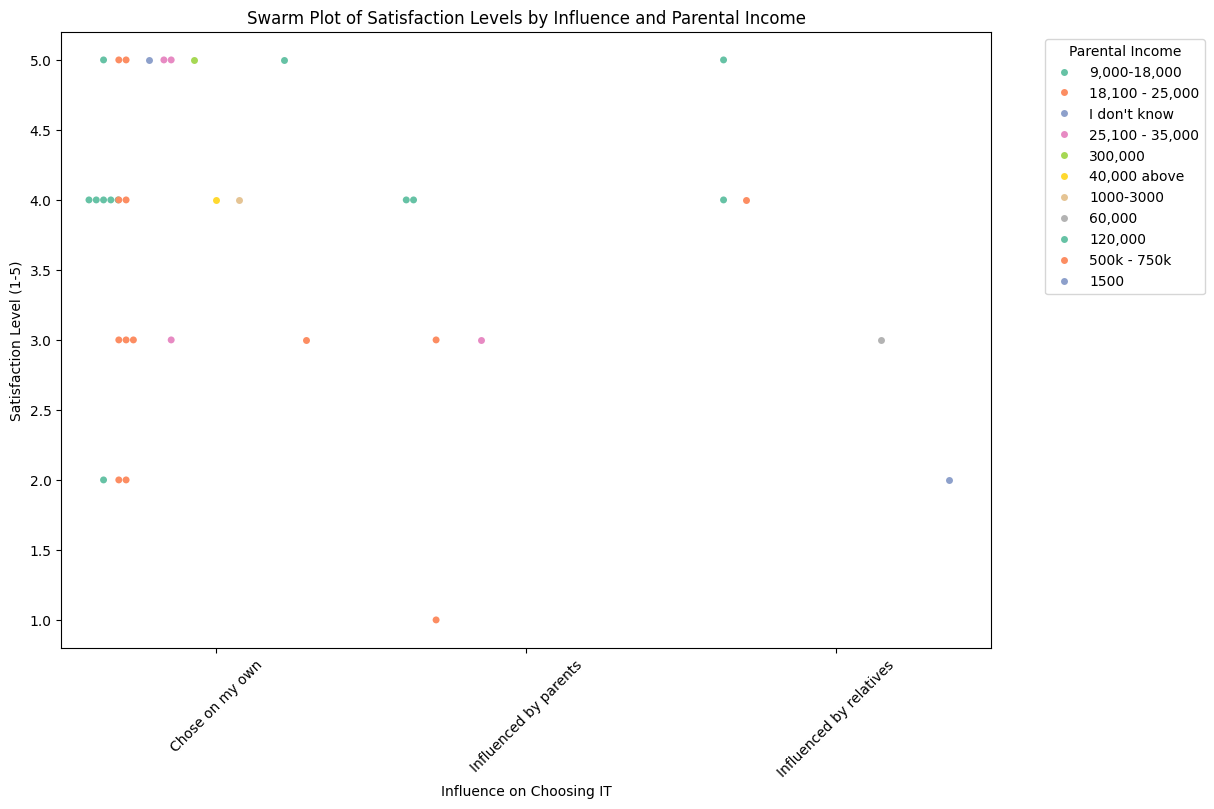

In [40]:
#Swarm Plot
plt.figure(figsize=(12, 8))
sns.swarmplot(x='2.  Did you choose to study IT on your own, or were you influenced by someone else? ',
              y='3.  On a scale from 1 to 5, how satisfied are you with your current course? ',
              hue='8.  What is your parents approximate monthly income? ',
              data=df, palette='Set2', dodge=True)
plt.title('Swarm Plot of Satisfaction Levels by Influence and Parental Income')
plt.xlabel('Influence on Choosing IT')
plt.ylabel('Satisfaction Level (1-5)')
plt.xticks(rotation=45)
plt.legend(title='Parental Income', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()